In [1]:
import tensorflow as tf
print(tf.__version__)

0.11.0


In [2]:
%matplotlib inline
import numpy.ma as ma
from numpy import isfinite



import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [4]:
cd /

/


In [5]:
cd Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017/

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [6]:
DataKarpos = pd.read_csv('Target.csv') # Only Karpos Location is used here . Other locations are zero

In [7]:
print ("Number of columns present : ");DataKarpos.columns.values.size

Number of columns present : 


27

In [8]:
DataKarpos.columns

Index(['Unnamed: 0', 'date', 'PM10', 'NAME', 'PM10_null_pointers', 'CO',
       'CO_null_pointers', 'NO2', 'NO2_null_pointers', 'O3',
       'O3_null_pointers', 'PM25', 'PM25_null_pointers', 'time', 'month',
       'day', 'hour', 'daysInterval', 'days_interval', 'hour_interval',
       'Centar', 'Gazi Baba', 'Karpos', 'Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat'],
      dtype='object')

In [9]:
DataKarpos.describe() # Describe data input 

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,60629.000000,89500.000000,57342.000000,89500.000000,42360.000000,89500.000000,50553.000000,89500.000000,36143.000000,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.476067,-0.450405,0.677419,-0.126302,0.640693,-0.025275,0.473296,0.164331,0.564838,0.066891,...,11.502346,0.0,0.096425,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,180855.980629,0.746962,0.467467,0.481382,0.479800,0.601696,0.499289,1.059082,0.495781,1.096480,...,6.921202,0.0,0.295174,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7.000000,-2.593269,0.000000,-0.465316,0.000000,-0.775219,0.000000,-1.071914,0.000000,-0.860290,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,156623.250000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,6.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,313248.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,...,12.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,469873.500000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,18.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,626496.000000,2.934737,1.000000,4.243175,1.000000,9.176899,1.000000,9.258671,1.000000,11.020234,...,23.000000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
DataKarpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 27 columns):
Unnamed: 0            89500 non-null int64
date                  89500 non-null object
PM10                  60629 non-null float64
NAME                  89500 non-null object
PM10_null_pointers    89500 non-null int64
CO                    57342 non-null float64
CO_null_pointers      89500 non-null int64
NO2                   42360 non-null float64
NO2_null_pointers     89500 non-null int64
O3                    50553 non-null float64
O3_null_pointers      89500 non-null int64
PM25                  36143 non-null float64
PM25_null_pointers    89500 non-null int64
time                  89500 non-null object
month                 89500 non-null int64
day                   89500 non-null int64
hour                  89500 non-null int64
daysInterval          89500 non-null object
days_interval         89500 non-null int64
hour_interval         89500 non-null int64
Centar           

## Extract Data And Feature set

In [11]:
TargetKarpos = DataKarpos[['PM10']].copy(deep=True) # copy PM10 data out from data sets

In [12]:
features_set = DataKarpos.copy(deep=True)

In [13]:
#del features_set['PM10'] # delete feature set  from data set

In [14]:
features_set.drop(['Unnamed: 0','date','day', 'time','Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat','daysInterval','NAME', 'hour_interval', 'days_interval','Centar', 'Gazi Baba'],axis=1,inplace=True)

In [15]:
print ("Number of columns present in Future set : ");features_set.columns.values.size

Number of columns present in Future set : 


13

In [16]:
features_set.columns

Index(['PM10', 'PM10_null_pointers', 'CO', 'CO_null_pointers', 'NO2',
       'NO2_null_pointers', 'O3', 'O3_null_pointers', 'PM25',
       'PM25_null_pointers', 'month', 'hour', 'Karpos'],
      dtype='object')

In [17]:
features_set[1:5] # Our feature set now comes out neat. Notice PM10 has been included in feature set.

,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,month,hour,Karpos
1,0.655947,1,0.332930,1,NaN,0,-0.094688,1,NaN,0,1,0,1.0
2,0.325387,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
3,0.325387,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
4,0.159634,1,-0.031487,1,NaN,0,-0.030862,1,NaN,0,1,2,1.0


# Analysis Of Mising Values For PM10

In [18]:
# Target and TargetKarpos defined above are the same

In [19]:
Target = DataKarpos[['PM10']].copy(deep=True)

In [20]:
Target.shape

(89500, 1)

In [21]:
null_data_PM10 = Target[Target.isnull().any(axis=1)] # extract data sets with null values

In [22]:
null_data_PM10.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [23]:
null_data_PM10.info() # Info about  non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28871 entries, 168 to 86692
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 451.1 KB


In [24]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 699.3 KB


In [25]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.450405
std,0.746962
min,-2.593269
25%,NaN
50%,NaN
75%,NaN
max,2.934737


In [26]:
def getPctMissing(series):
    '''
    Returns percentage of Missing data in a data set.
    Input : Pandas series
    Output: Percentage of missing data in data set
    '''
    num = series.isnull().sum()
    Total_data = len(series)
    return 100*(num/Total_data)

In [27]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [28]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [29]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    32.258101
dtype: float64

# Data After Cleaning

In [30]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.450405
std,0.746962
min,-2.593269
25%,NaN
50%,NaN
75%,NaN
max,2.934737


In [31]:
Target = Target.reset_index(drop=True)

In [32]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 699.3 KB


In [33]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [34]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [35]:
Target.head()

,PM10
0,0.655947
1,0.655947
2,0.325387
3,0.325387
4,0.159634


# Delete Zero values 

In [36]:
Target.drop(Target.index[168:215],inplace=True);# 16 consecutive entries missing
Target.drop(Target.index[337:361],inplace=True);# 
Target.drop(Target.index[961:984],inplace=True);
Target.drop(Target.index[1082:1105],inplace=True)
Target.drop(Target.index[1088:1106],inplace=True)
Target.drop(Target.index[1569:1593],inplace=True)
Target.drop(Target.index[1689:1705],inplace=True)
Target.drop(Target.index[2272:2296],inplace=True)
Target.drop(Target.index[3470:3592],inplace=True)
Target.drop(Target.index[16707:35423],inplace=True)



In [37]:
features_set.drop(features_set.index[168:215],inplace=True);# 16 consecutive entries missin
features_set.drop(features_set.index[337:361],inplace=True);# 
features_set.drop(features_set.index[961:984],inplace=True);
features_set.drop(features_set.index[1082:1105],inplace=True)
features_set.drop(features_set.index[1088:1106],inplace=True)
features_set.drop(features_set.index[1569:1593],inplace=True)
features_set.drop(features_set.index[1689:1705],inplace=True)
features_set.drop(features_set.index[2272:2296],inplace=True)
features_set.drop(features_set.index[3470:3592],inplace=True)
features_set.drop(features_set.index[16707:35423],inplace=True)

In [38]:
features_set.head()

,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,month,hour,Karpos
0,0.655947,1,0.332930,1,NaN,0,-0.094688,1,NaN,0,1,0,1.0
1,0.655947,1,0.332930,1,NaN,0,-0.094688,1,NaN,0,1,0,1.0
2,0.325387,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
3,0.325387,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
4,0.159634,1,-0.031487,1,NaN,0,-0.030862,1,NaN,0,1,2,1.0


In [39]:
Target = Target.reset_index(drop=True)
features_set = features_set.reset_index(drop=True)

In [40]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    10098
dtype: int64

In [41]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    14.330925
dtype: float64

In [42]:
features_set.columns

Index(['PM10', 'PM10_null_pointers', 'CO', 'CO_null_pointers', 'NO2',
       'NO2_null_pointers', 'O3', 'O3_null_pointers', 'PM25',
       'PM25_null_pointers', 'month', 'hour', 'Karpos'],
      dtype='object')

# Fill Na with Local mean

In [43]:
features_set.fillna(features_set.median(),inplace=True); # Fill Nan with the median variable

In [44]:
#With time series data, using pad/ffill is extremely common so that the “last known value” 
#is available at every time point.

In [45]:
#Target.fillna(method='pad', limit=)
features_set.dtypes

PM10                  float64
PM10_null_pointers      int64
CO                    float64
CO_null_pointers        int64
NO2                   float64
NO2_null_pointers       int64
O3                    float64
O3_null_pointers        int64
PM25                  float64
PM25_null_pointers      int64
month                   int64
hour                    int64
Karpos                float64
dtype: object

In [46]:
features_set.isnull().sum()

PM10                  0
PM10_null_pointers    0
CO                    0
CO_null_pointers      0
NO2                   0
NO2_null_pointers     0
O3                    0
O3_null_pointers      0
PM25                  0
PM25_null_pointers    0
month                 0
hour                  0
Karpos                0
dtype: int64

# Prepare Data 

In [47]:
column_size = features_set.columns.values.size # this is size of list element size
Target_list = Target.values.tolist() # create a list of values for use in data model
feature_list= features_set.values.tolist()

In [48]:
counter=0
def dataGetter(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter;
    assert type(datalist) == list;
    
    
    value = datalist[counter]
    #print(counter)


    counter = counter +1
             
    return np.array([value])

In [49]:
counter_t=0
def dataGetter_target(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter_t;
    assert type(datalist) == list;
    
    
    value = datalist[counter_t]
    #print(counter)


    counter_t = counter_t +1
             
    return np.array([value])

In [50]:
# Define window size or learning
sliding_window = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window.append(dataGetter(Target_list))

In [51]:
sliding_window_featureset = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window_featureset.append(dataGetter_target(feature_list))

In [52]:
import math
def get_pair(Target,Target2):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    
    Do some median filling. The target variable is converted into 
    a data frame and fill nan with median. The median is chosen because
    its more robust to outliers.
    
    Input: Feature List=Target2, Target=Target
    Input Dtype : List
    Output: Input Array, Output Array 24 steps ahead
    Output Data type : Array
    """
 
    global sliding_window
    global sliding_window_featureset
    sliding_window.append(dataGetter(Target))
    #print(len(sliding_window))
    sliding_window_featureset.append(dataGetter_target(Target2))
    df1 = pd.DataFrame({'test_set': sliding_window}) #MAKE A data frame with column name test_set
    df1.fillna(df1.median(),inplace=True); # fill na with median. It is easier to fill with median in
                                           # pandas data frame  
    
    input_value = sliding_window_featureset[0:24]
    
    
    input_value=np.array(input_value)
    
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,len(input_value)*column_size))
    mx = np.ma.masked_invalid(input_value)
    
    ##print(input_value)
    sliding_window = df1.values.tolist()
    output_value = np.array(sliding_window[-1])
    
    ####remove last value from sliding_window
    _ = sliding_window_featureset[-1]
    ##print(output_value)
    sliding_window = sliding_window[1:]
    sliding_window_featureset = sliding_window_featureset[1:]
    #print(len(sliding_window))
    # Process output
    output = output_value.reshape(1,1);
     
    if math.isnan(output):
        assert (math.isnan(output))
        output1 = np.array([0.])
        output1 = output1.reshape(1,1)
    else:
        output1=output;
    
   
    
    
    return input_value,output1

In [53]:
a =np.array ([1,2,3,np.nan])

# Build Model

In [54]:
#Imports
import tensorflow as tf
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *


In [55]:
#Input Params
NUMBER=0; # replacement for nan
with tf.name_scope("input_target_placeholders"):    
    input_dim = 1
    ##The Input Layer as a Placeholder
    #Since we will provide data sequentially, the 'batch size'
    #is 1.
    features = tf.placeholder(tf.float32, [1, input_dim*312],name="input_data")
    y_input = tf.placeholder(tf.float32, [1, input_dim],name="target_data")
    

In [56]:
###inistate = tf.Variable(lstm_cell_with_dropout.zero_state(BATCH_SIZE, tf.float32), trainable=False)

In [57]:
with tf.name_scope("lstmLayer"):    
    lstm_layer1 = rnn_cell.LSTMCell(input_dim*312,state_is_tuple=False, use_peepholes=True,forget_bias=1.0)
    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name="initial_state")
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(features, lstm_state1)
    #The LSTM state will get updated
    lstm_update_op1 = lstm_state1.assign(lstm_state_output1)

In [58]:
lstm_output1.get_shape() # verify shape

TensorShape([Dimension(1), Dimension(312)])

In [59]:
with tf.name_scope("weight_Bias_learning_rate"):
    global_step = tf.Variable(0, trainable=False,name="global_step")
    starter_learning_rate = 0.07
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1000, 1.0, staircase=False,name ="Exponential_decay")
    ##The Regression-Output Layer
    #The Weights and Biases matrices first
    output_W1 = tf.Variable(tf.truncated_normal([input_dim*312,input_dim]),name="weight")
    output_b1 = tf.Variable(tf.zeros([input_dim]),name="bias")
    
    

In [60]:
output_W1.get_shape()

TensorShape([Dimension(312), Dimension(1)])

In [61]:
with tf.name_scope("prediction"):
    #Compute the output
    
    final_output = tf.matmul(lstm_output1, output_W1) + output_b1

In [62]:
final_output.get_shape() # verify output shape

TensorShape([Dimension(1), Dimension(1)])

In [63]:
#loss = your regular output loss
lambda_l2_reg=0.5
l2 = lambda_l2_reg * sum(
    tf.nn.l2_loss(tf_var)
        for tf_var in tf.trainable_variables()
        if not ("noreg" in tf_var.name or "bias" in tf_var.name)
)
#loss += l2

In [64]:
with tf.name_scope("RMS_error"):
    ##Calculate the Sum-of-Squares Error
    
    error = error=tf.reduce_sum(tf.pow(final_output - y_input, 2)) + l2

In [65]:
with tf.name_scope("optimizer"):
    ##The Optimizer
    #Adam works best
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

In [66]:
# Create a summary to monitor MSE
mse=tf.summary.tensor_summary("errors_Summary",error)
# Create a summary to monitor  predictions
prediction=tf.summary.tensor_summary("predictions_Summmary", final_output)
# Create a summary to monitor bias
bias_vec=tf.summary.tensor_summary("bias", output_b1)
# create sumary
#rate_vec=tf.summary.scalar("rate", learning_rate)


#histogram plot

error_stats=tf.histogram_summary("errors_Histogram",error)
weight_stats=tf.histogram_summary("weights_Histogram",output_W1)
bias_stats=tf.histogram_summary("biases_Histogram",output_b1)
#learning_stats=tf.histogram_summary("biases_Histogram",learning_rate)


#merged_summary_op =  tf.merge_all_summaries()
merged_summary_op =   tf.merge_summary([mse,prediction,bias_vec,error_stats,weight_stats,bias_stats])

In [67]:
##Session
sess = tf.Session()
#Initialize all Variables
#sess.run(tf.initialize_all_variables())


# Evaluation Data set

In [68]:
logs_path = '/Users/Seychelles/Desktop/GoogleTensorflow/finals/tensorboardData/mask_other_local_median/' # for tensorfboard

In [69]:
##Training Parameters
n_iter = len(Target_list)-48  # Train the model. Except the last 24 hrs which we will use for prediction test
                              # we could have also used the last 48 hrs as prediction test but lets keep
                              # things simple at first

actual_output1 = []
network_output1 = []
inner_iter = 6000



In [70]:
len(Target_list)

70463


# Feature and Target prediction set 

In [71]:
import copy
#new_list = copy.deepcopy(old_list)
Test_eval=copy.deepcopy(Target_list[n_iter:]) # copy out data set for validation and testing

In [72]:
Feature_eval=copy.deepcopy(feature_list[n_iter:]) # copy out feature set for validation

In [73]:
len(Feature_eval)

48

# Errors Plot

In [74]:
writer = tf.train.SummaryWriter(logs_path, graph= tf.get_default_graph())

In [75]:
init = tf.initialize_all_variables()
error_=[]

sess.run(init)
counter =0 
counter_t=0
assert counter==0

for i in range(n_iter):
    input_v ,output_v = get_pair(Target_list,feature_list)
    #print(output_v)
    
        
    #print(input_v.shape)
    #print (dtype(input_v))
    #print(input_mask.shape)
    #print(output_mask.shape)
    #print(output_v.shape)
    _, _, network_output,errors,summary = sess.run([lstm_update_op1,
                                     train_step,
                                     final_output,error,merged_summary_op],
                                    feed_dict = {
                                        features:input_v,
                                        y_input: output_v})
    writer.add_summary(summary)
    error_.append(errors)
    if i%inner_iter==0 & i!=0:
           assert i!=0;
           #reset state
           sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))
        
    actual_output1.append(output_v)
        #actual_output2.append(output_v[0][1])
    network_output1.append(network_output)
        #network_output2.append(network_output[0][1])
        #x_axis.append(i)
                

In [76]:
errorplot = np.array(error_)
errorplot = errorplot.reshape(len(error_),1)

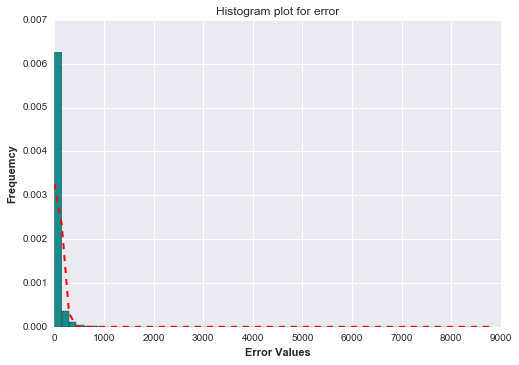

In [77]:
import matplotlib.mlab as mlab
"""
Make a histogram of normally distributed random numbers and plot the
analytic PDF over it
"""
#fig, ax = plt.subplots()
n, bins, patches=plt.hist(errorplot,60,normed=1,facecolor='teal',alpha=0.9)
mu= np.mean(errorplot);sigma=np.std(errorplot);
y = mlab.normpdf( bins,mu,sigma)
plt.plot(bins, y, 'r--', linewidth=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Histogram plot for error")
plt.ylabel("Frequemcy",fontweight='bold')
plt.xlabel("Error Values",fontweight='bold')
plt.show()

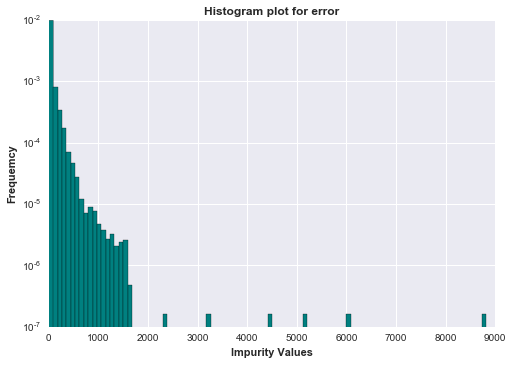

In [78]:
import matplotlib.mlab as mlab

fig, ax = plt.subplots()
plt.hist(errorplot,bins=100,normed=1,facecolor='teal')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Histogram plot for error",fontweight='bold')
plt.ylabel("Frequemcy",fontweight='bold')
plt.xlabel("Impurity Values",fontweight ='bold')
plt.show()

# Extract Date in the series

In [79]:
from matplotlib.dates  import  date2num
Data = pd.read_csv('ItemListWithDummy.csv')

In [80]:
pd.to_datetime(Data.date);

In [81]:
x_axis = Data['date']

In [82]:
x_axis = pd.to_datetime(x_axis)

In [83]:
#80000-len(network_output1)

In [84]:
network = np.array(network_output1)

In [85]:
actual= np.array(actual_output1)

In [86]:
actual.shape[0]

70415

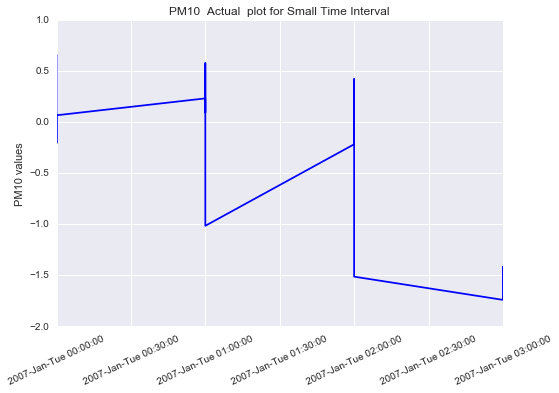

In [87]:
import matplotlib.pyplot 
import matplotlib.dates




fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot_date(x_axis[0:48], actual.reshape(actual.shape[0],1)[0:48], 'b-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
#plt.tight_layout()
plt.ylabel("PM10 values")
plt.title("PM10  Actual  plot for Small Time Interval")
plt.show()

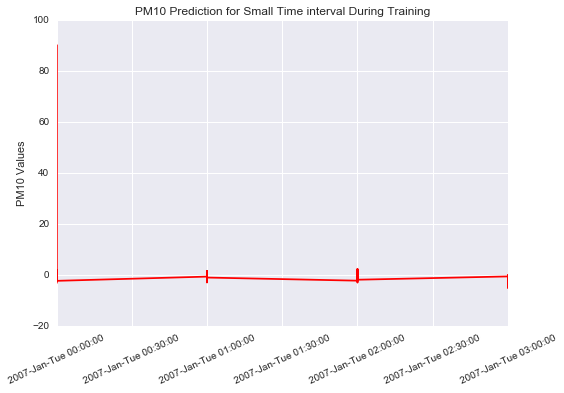

In [88]:
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:48], network.reshape(actual.shape[0],1)[0:48], 'r-')

#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 Values")
plt.title("PM10 Prediction for Small Time interval During Training")
plt.show()

# Plots predictions during Training

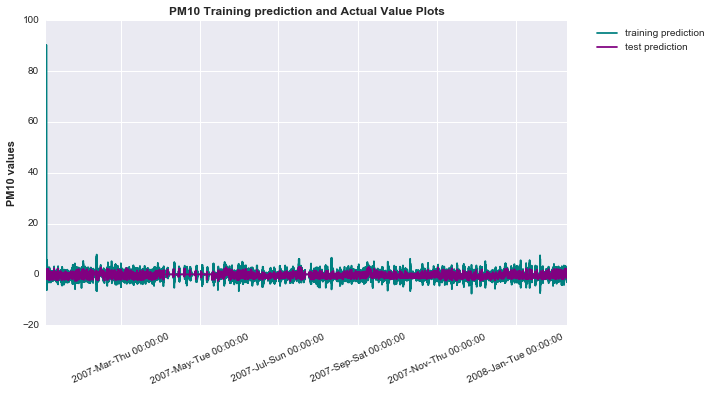

In [89]:
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:actual.shape[0]], network.reshape(actual.shape[0],1)[0:actual.shape[0]], 'r-',color='teal',label="training prediction")
ax.plot_date(x_axis[0:actual.shape[0]], actual.reshape(actual.shape[0],1)[0:actual.shape[0]], 'b-',color='purple',label='test prediction')


#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 values",fontweight='bold')
plt.title("PM10 Training prediction and Actual Value Plots",fontweight='bold')
plt.show()

In [90]:
def get_pair_Test(Target):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    """
 
    
    global sliding_window_test
    #sliding_window_test.append(dataGetter(Target))
    #print(len(sliding_window))
    #sliding_window_featureset.append(dataGetter_target(Target2))
    
    #input_value = sliding_window_test
    
    
    input_value=np.array(sliding_window_test)
    #print(input_value.shape)
    
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,len(sliding_window_test)*column_size))
    mx = np.ma.masked_invalid(input_value)
    
    ##print(input_value)
    #output_value = sliding_window[-1]
    #my = np.ma.masked_invalid(output_value)
    ####remove last value from sliding_window
    #_ = sliding_window_featureset[-1]
    ##print(output_value)
   # sliding_window = sliding_window[1:]
    #sliding_window_featureset = sliding_window_featureset[1:]
    #print(len(sliding_window))
    # Process output
    mask_x = ~mx.mask # let mask return true for those non-nan values
    ## y output
    #mask_y =~my.mask
    #mask_yfloat = mask_y
    return input_value

# Model Testing Plot

In [91]:
init =  tf.initialize_all_variables()


In [92]:
counter_test=0;
def dataGetter_test(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter_test;
    assert type(datalist) == list;
    
    
    value = datalist[counter_test]
    #print(counter)


    counter_test = counter_test +1
             
    return value

In [93]:
sliding_window_test = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    temp=dataGetter_test(Feature_eval)
    
    sliding_window_test.append(temp);
    

In [94]:
previous_sliding_window_length=24;
time_step_shift = 24;

In [95]:
len(sliding_window_test[23])

13

In [96]:
len(sliding_window_test)

24

In [97]:
len(Feature_eval[0])

13

In [98]:
##Testing
 

#Flush LSTM state
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])));

In [99]:
len(sliding_window_test[12])

13

In [100]:
# Testing plot

actual_output_test = []
network_output_test = []

 
for i in range(previous_sliding_window_length):
   
    input_v = get_pair_Test(sliding_window_test)
    _, network_output = sess.run([lstm_update_op1,
                                  final_output],
                                 feed_dict = {
                                     features:input_v})
       
    array_store=np.array(Feature_eval[time_step_shift]) 
    array_store[[0]] = network_output # replace real PM10 values with predicted values
    list_store = array_store.tolist() # conver to list
    #print(len(list_store))
    sliding_window_test.append( list_store) # append new values for prediction
    #print(len(sliding_window_test))
    sliding_window_test.pop(0) # remove the first value of the list 
    #print(len(sliding_window_test))
    time_step_shift = time_step_shift + 1; # increae the time step
    network_output_test.append(network_output)

In [101]:
a=np.array([[1,2,3],[4,5,6]])

In [102]:
a[1][0]=4

In [103]:
a

array([[1, 2, 3],
       [4, 5, 6]])

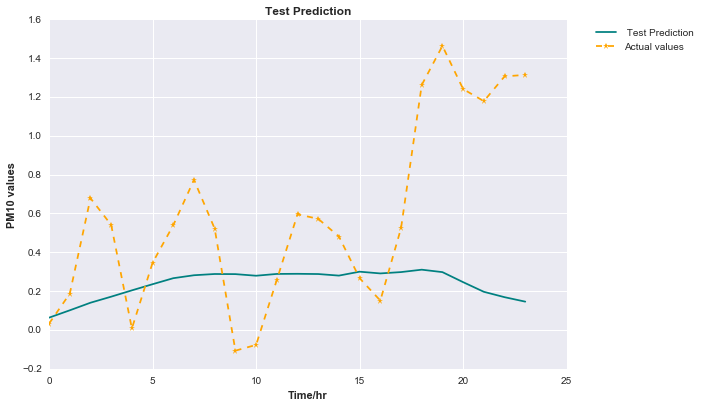

In [104]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(len(network_output_test),1), 'r-',color='teal',linestyle='-',marker="x",label=" Test Prediction")
ax.plot(np.array(Target_list[-24:]).reshape(len(Target_list[-24:]),1), '*',color="orange" ,linestyle='--',label="Actual values")
plt.tight_layout()
plt.ylabel("PM10 values",fontweight='bold')
plt.xlabel("Time/hr",fontweight='bold')
plt.title("Test Prediction",fontweight='bold')


#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
mean_squared_error(np.array(network_output_test).reshape(len(Target_list[-24:]),1),np.array(Target_list[-24:]).reshape(len(network_output_test),1) )**0.5 

0.5878543074204895

In [107]:
len(network_output_test)

24

In [108]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [109]:
rsquared(np.array(network_output_test).reshape(len(Target_list[-24:]),),np.array(Target_list[-24:]).reshape(len(network_output_test),) ) 

3.6626585469385197e-05

# Prediction 

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
mean_squared_error(real.PM10, pred_)**0.5   # using scikit rmse function

NameError: name 'real' is not defined

In [ ]:
rmse =np.sqrt(np.sum((pred.values-real.PM10)**2)/len(pred))